# Plots the human recognition compared to the model recognition of the metamers used each behavioral experiment. 

The average data for each participant for each condition was exported to a .mat file (MATLAB was used for the statistics), and these are used for plotting here. 

Each model included in each experiment is plotted separately here for simplicity and ease of showing the generating network-predictions. For paper figures, multiple models of the same architecture within the same experiment were shown on the same plot. 


In [1]:
from scipy.io import loadmat
import matplotlib.image
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import urllib.request, json 
from model_analysis_folders import all_model_info

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from notebooks.notebook_helpers import unpack_experiment_mat

# Visual Experiments

Visual Experiment 1 (Standard Models)


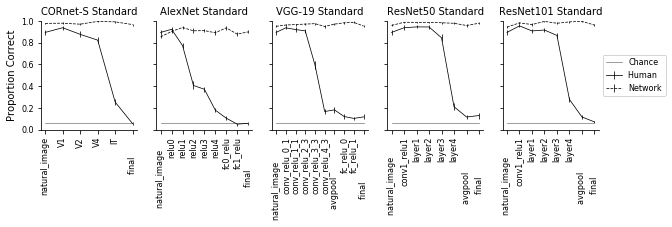

Visual Experiment 2 (Large-Scale Dataset Models)


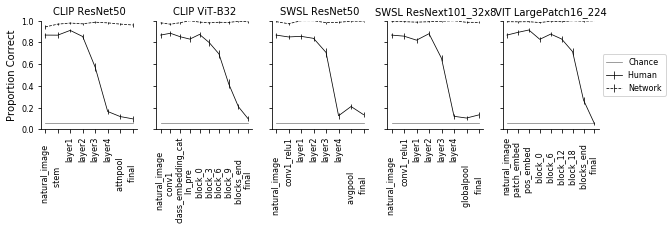

Visual Experiment 3 (Self-Supervised Models)


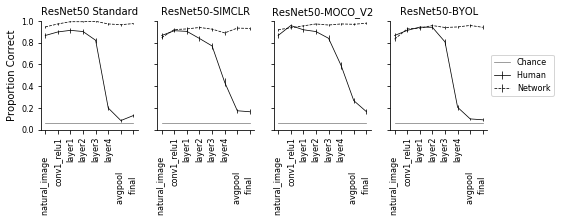

Visual Experiment 4 (IPCL AlexNetGN)


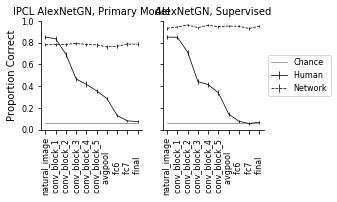

Visual Experiment 5 (Stylized-ImageNet Trained Models)


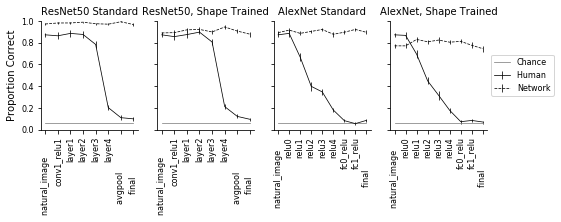

Visual Experiment 6 (HMAX)


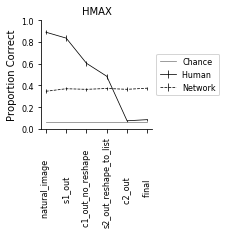

Visual Experiment 7 (ResNet50 Adversarially Robust)


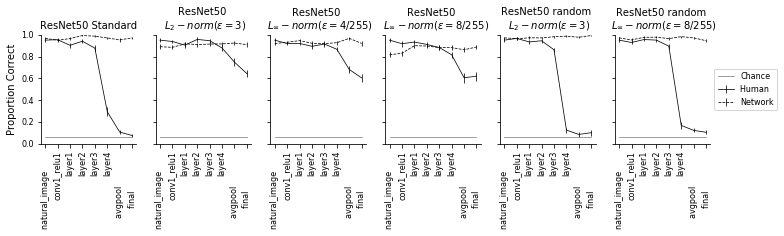

Visual Experiment 8 (AlexNet Adversarially Robust)


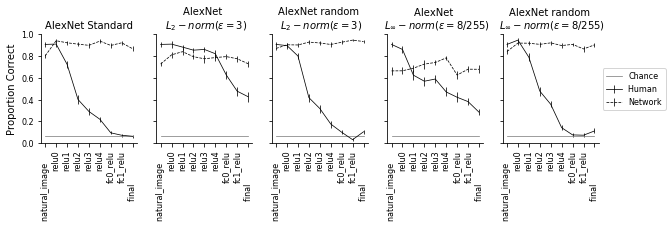

Visual Experiment 12 (Lowpass AlexNet and VOneNet)


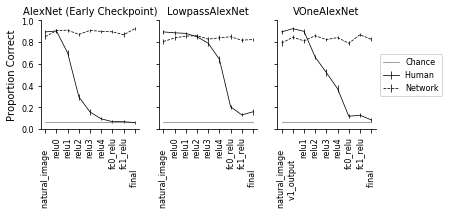

In [2]:
# This ordering of experiments matches the ordering for when experiments appear in Feather et al. 2023.
# Matches Supplementary Table 5

experiment_list = [1,12,5,16,10,6,3,4,9]

for exp_num in experiment_list:
    experiment_name = all_model_info.TURK_IMAGE_EXPERIMENTS_GROUPINGS['experiment_%d'%exp_num]['paper_experiment_name']
    jsin_configs = all_model_info.TURK_IMAGE_EXPERIMENTS_GROUPINGS['experiment_%d'%exp_num]['experiment_params_web']

    # TODO: where to save these? 
    # Can we pull it directly from the mcdermott server? 
    with urllib.request.urlopen(jsin_configs) as url:
        experiment_params = json.loads(url.read().decode())

    condition_names = experiment_params['experiment_conditions']
    plot_model_order = experiment_params['experiment_info']['networks']

    print(experiment_name)
    plt.figure(figsize=(len(experiment_params['experiment_info']['networks'])*2,2))


    for n_idx, network in enumerate(experiment_params['experiment_info']['networks']):
        model_name = all_model_info.ALL_NETWORKS_AND_LAYERS_IMAGES[network]['paper_name']
        network_plot_idx = plot_model_order.index(network)+1
        ax = plt.subplot(1,len(experiment_params['experiment_info']['networks']), network_plot_idx)


        participant_data_matrix, model_layers, conditions, participants = unpack_experiment_mat(
            '../VisionBehavioralExperiments/EXP%d_ANALYSIS/VisionExperiment%d_network_vs_humans_datamatrix_%s_public.mat'%(exp_num, exp_num, network))

        plt.errorbar(range(len(model_layers)), np.mean(participant_data_matrix[:,:,0],0), 
                     yerr=np.std(participant_data_matrix[:,:,0],0)/np.sqrt(len(participants)),
                     color='k', label=conditions[0], linewidth=0.75)
        plt.errorbar(range(len(model_layers)), np.mean(participant_data_matrix[:,:,1],0), 
                     yerr=np.std(participant_data_matrix[:,:,1],0)/np.sqrt(len(participants)),
                     color='k', linestyle='--', label=conditions[1], linewidth=0.75)

        plt.plot(range(len(model_layers)), np.ones(len(model_layers))*1/16, 
                 color='grey', label='Chance', linewidth=0.75)    
        plt.ylim(0,1)
        plt.yticks(fontsize=8)
        plt.xticks(ticks=range(len(model_layers)), 
                   labels=[layer.split('_fake_relu')[0] for layer in model_layers], 
                   rotation=90, fontsize=8)

        plt.title(model_name, fontsize=10)
        if network_plot_idx == (len(experiment_params['experiment_info']['networks'])):
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        if network_plot_idx > 1:
            ax.get_yaxis().set_ticklabels([])
        else:
            plt.ylabel('Proportion Correct', fontsize=10)
            
    plt.show()


# Audio Models

Audio Experiment 1 (Standard Models)


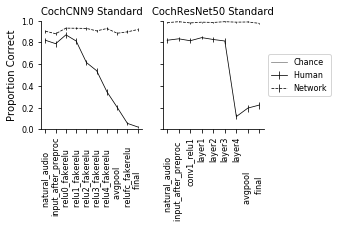

Audio Experiment 2 (Spectemp Model)


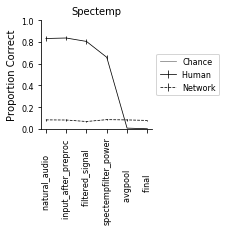

Audio Experiment 3 (CochResNet50 Waveform Adversarial Training)


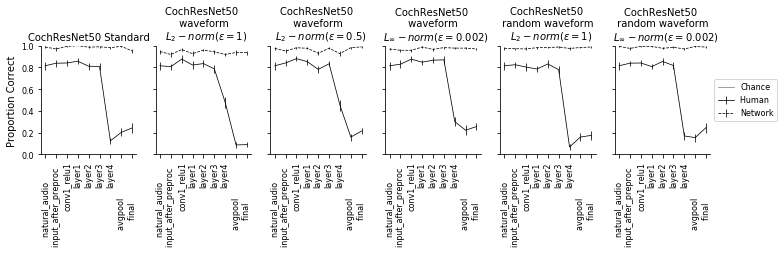

Audio Experiment 4 (CochCNN9 Waveform Adversarial Training)


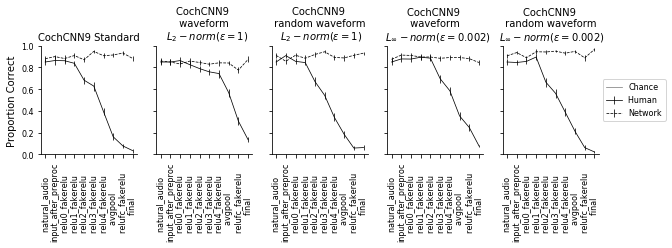

Audio Experiment 5 (CochResNet50 Cochleagram Adversarial Training)


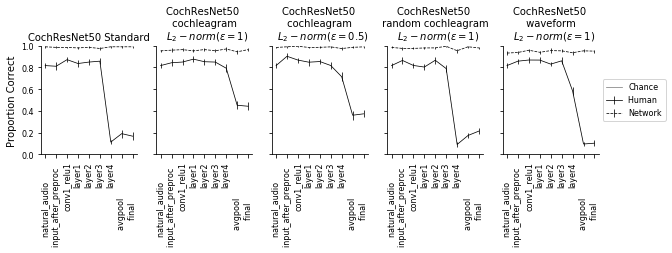

Audio Experiment 6 (CochCNN9 Cochleagram Adversarial Training)


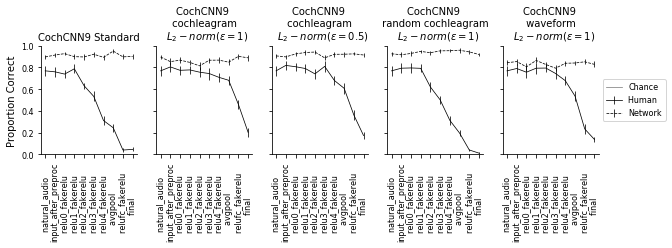

In [3]:
# This ordering of experiments matches the ordering for when experiments appear in Feather et al. 2022. 
experiment_list = [1,6,3,4,7,8]

for exp_num in experiment_list:
    experiment_name = all_model_info.TURK_AUDIO_EXPERIMENTS_GROUPINGS['experiment_%d'%exp_num]['paper_experiment_name']
    jsin_configs = all_model_info.TURK_AUDIO_EXPERIMENTS_GROUPINGS['experiment_%d'%exp_num]['experiment_params_web']

    # TODO: where to save these? 
    # Can we pull it directly from the mcdermott server? 
    with urllib.request.urlopen(jsin_configs) as url:
        experiment_params = json.loads(url.read().decode())

    condition_names = experiment_params['experiment_conditions']
    plot_model_order = experiment_params['experiment_info']['networks']

    print(experiment_name)
    plt.figure(figsize=(len(experiment_params['experiment_info']['networks'])*2,2))


    for n_idx, network in enumerate(experiment_params['experiment_info']['networks']):
        model_name = all_model_info.ALL_NETWORKS_AND_LAYERS_AUDIO[network]['paper_name']
        network_plot_idx = plot_model_order.index(network)+1
        ax = plt.subplot(1,len(experiment_params['experiment_info']['networks']), network_plot_idx)


        participant_data_matrix, model_layers, conditions, participants = unpack_experiment_mat(
            '../AuditoryBehavioralExperiments/EXPERIMENT_%d/AudioExperiment%d_network_vs_humans_datamatrix_%s_public.mat'%(exp_num, exp_num, network))
        plt.errorbar(range(len(model_layers)), np.mean(participant_data_matrix[:,:,0],0), 
                     yerr=np.std(participant_data_matrix[:,:,0],0)/np.sqrt(len(participants)),
                     color='k', label=conditions[0], linewidth=0.75)
        plt.errorbar(range(len(model_layers)), np.mean(participant_data_matrix[:,:,1],0), 
                     yerr=np.std(participant_data_matrix[:,:,1],0)/np.sqrt(len(participants)),
                     color='k', linestyle='--', label=conditions[1], linewidth=0.75)

        # Note: the network chance performance is 1/794 (because the network can choose "null" as a class). 
        # Human class performance is used, but is really indistinguishable when plotted... 
        plt.plot(range(len(model_layers)), np.ones(len(model_layers))*1/793, 
                 color='grey', label='Chance', linewidth=0.75)    
        plt.ylim(0,1)
        plt.yticks(fontsize=8)
        plt.xticks(ticks=range(len(model_layers)), 
                   labels=[layer.split('_fake_relu')[0] for layer in model_layers], 
                   rotation=90, fontsize=8)

        plt.title(model_name, fontsize=10)
        if network_plot_idx == (len(experiment_params['experiment_info']['networks'])):
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        if network_plot_idx > 1:
            ax.get_yaxis().set_ticklabels([])
        else:
            plt.ylabel('Proportion Correct', fontsize=10)
            
    plt.show()